In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import savefig

In [2]:
# Load the clean data into variables
DataPath = "Processed Data/"

dicts = ['EFI_ID_List', 'metabolite_dict', 'Protein_seq_dict']

with open(DataPath + 'EFI_ID_List.p', 'rb') as EFI_ID:
    EFI_ID_List = pickle.load(EFI_ID)

with open(DataPath + 'metabolite_dict.p', 'rb') as metabolite:
    metabolite_dict = pickle.load(metabolite)

with open(DataPath + 'Protein_seq_dict.p', 'rb') as Protein_seq:
    Protein_seq_dict = pickle.load(Protein_seq)

activations = pd.read_csv(DataPath + 'activations.csv', index_col=0)

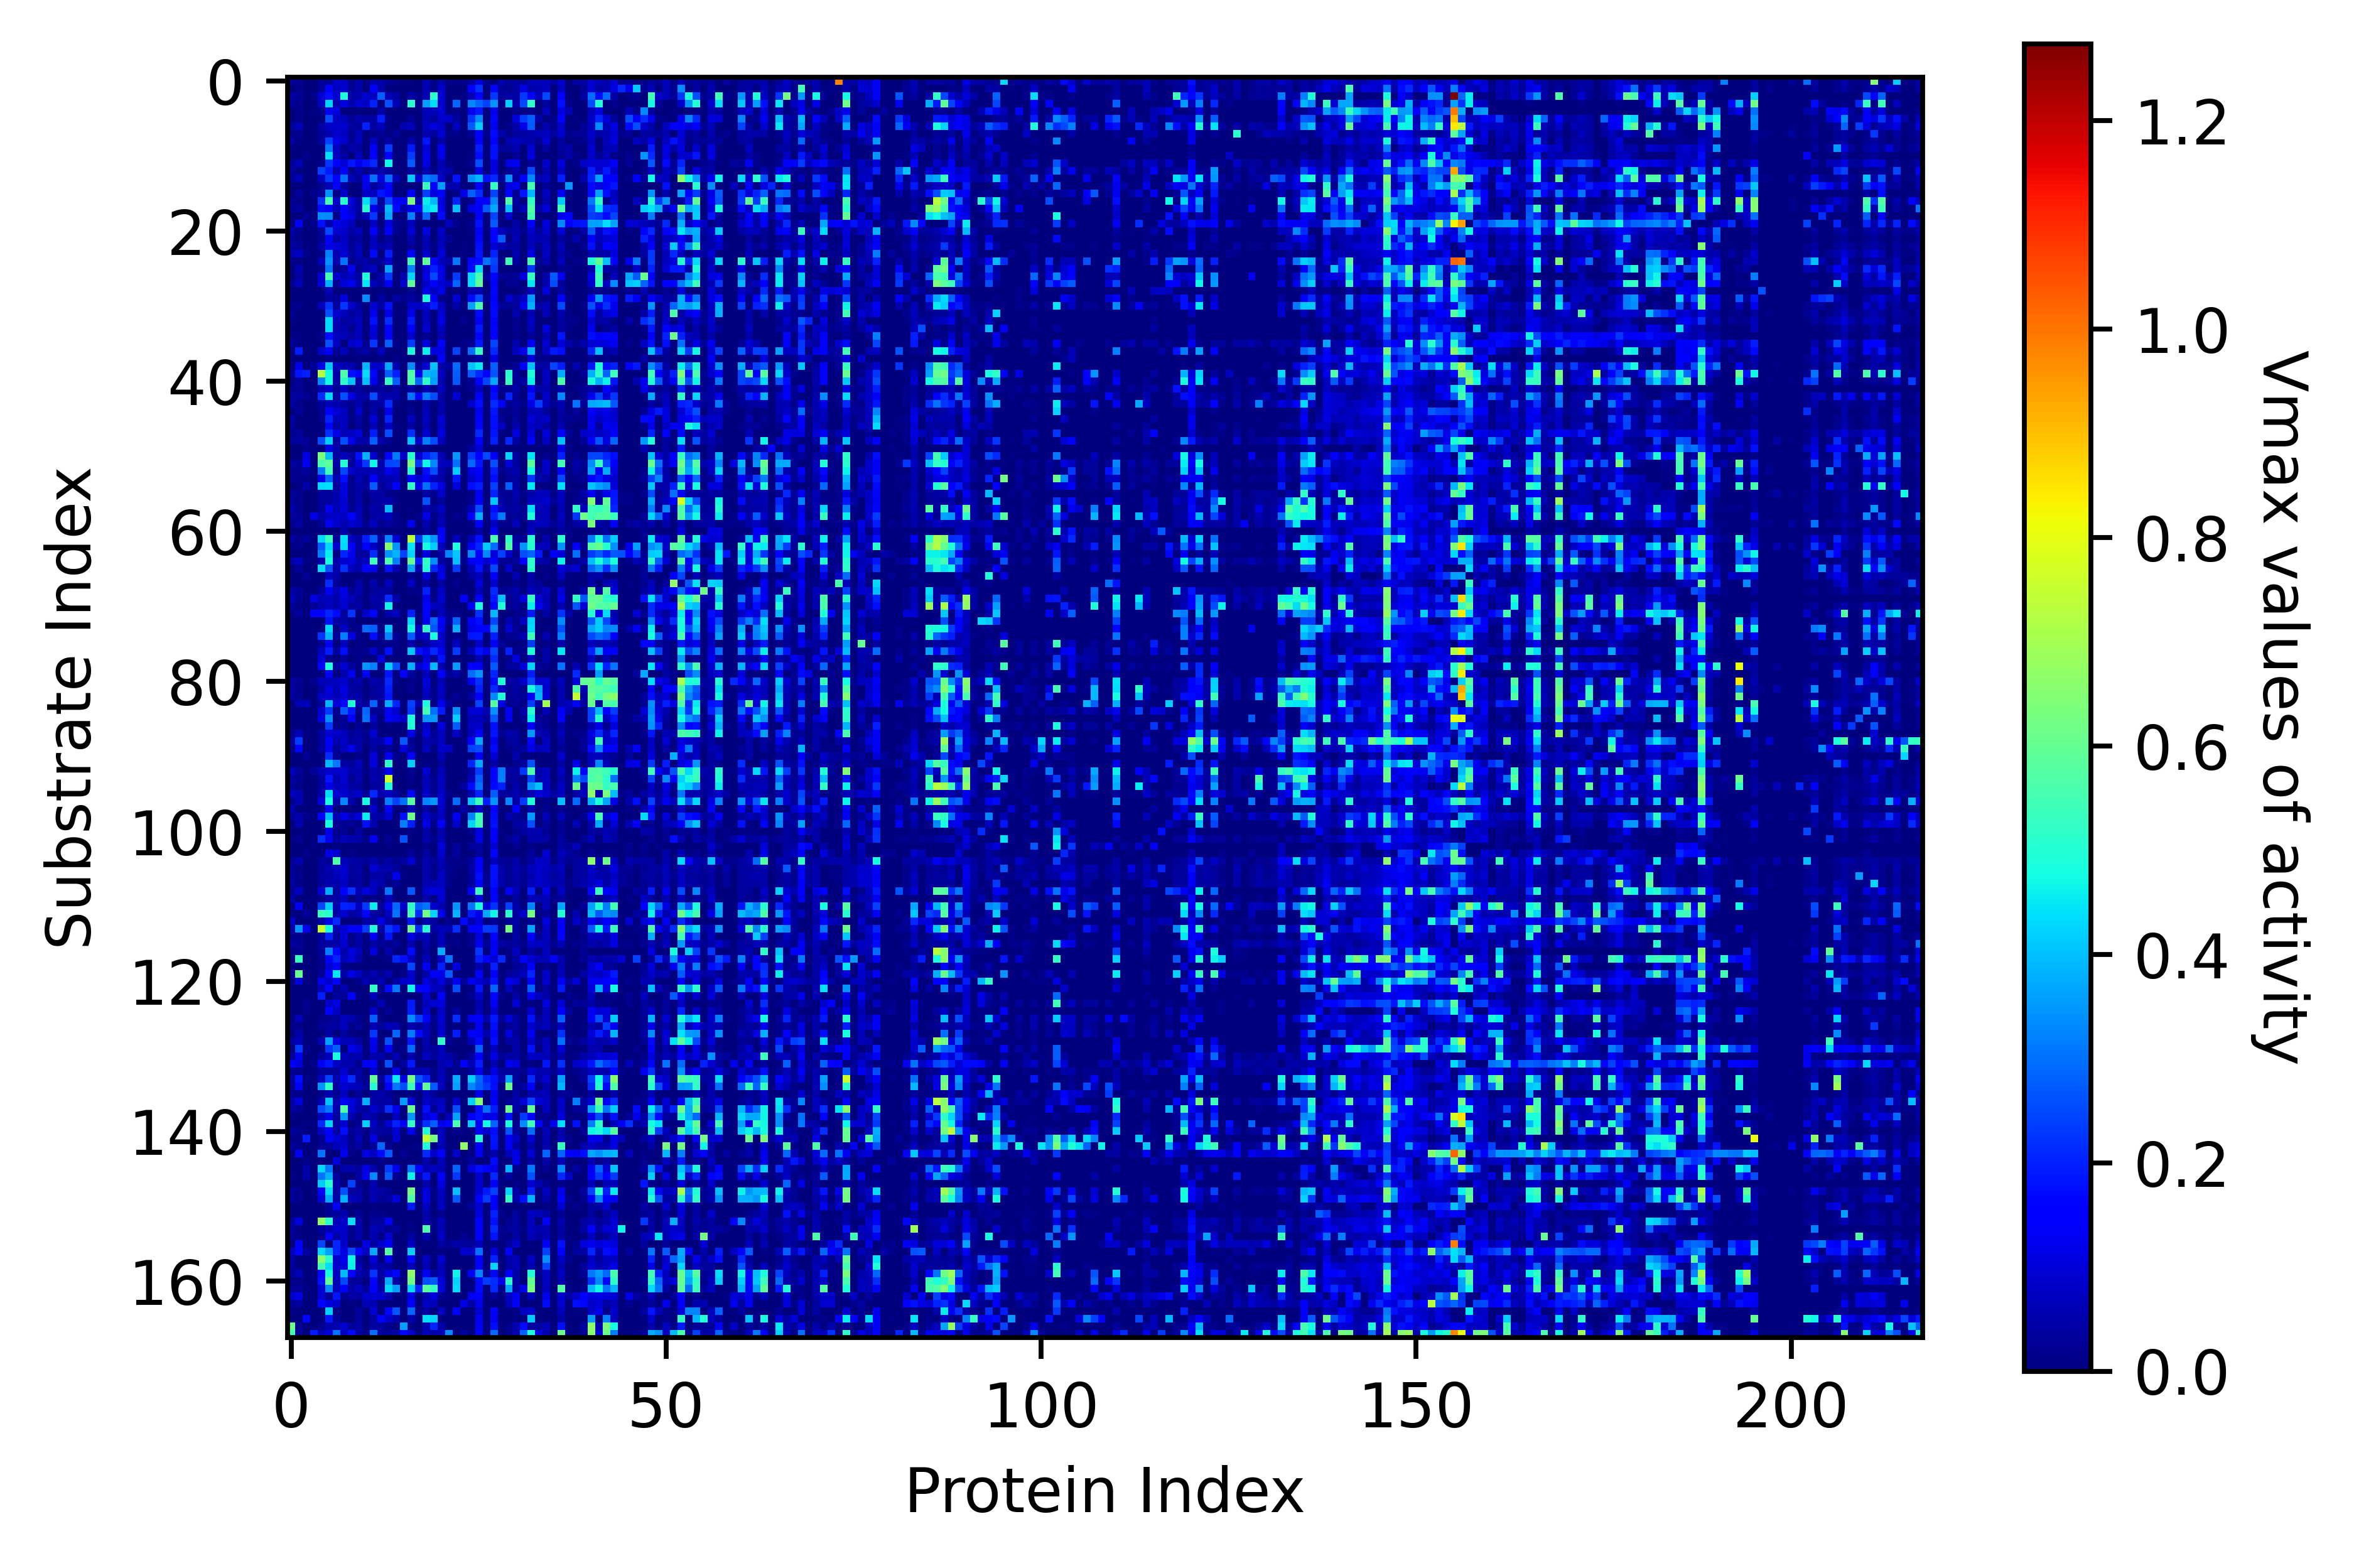

In [20]:
def Heatmap(df=activations, xlabel="Protein Index", ylabel="Substrate Index", dpi=700):
    # Generate heatmap of raw data and activations
    plt.figure(dpi=dpi)
    heatmap = plt.imshow(df) # Creates heatmap using input dataframe/array
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.jet() # Specifies the "jet" colormap
    clb = plt.colorbar() # Displayes colourbar
    clb.ax.set_ylabel('Vmax values of activity',rotation=270, labelpad=13)
    
    # Need to choose to show heat map or savefig, cannot do both in one operation
    # It turns out that savefig also displays the figure, who knew?

    # plt.show(heatmap)
    # plt.close()
    plt.savefig('HeatMap.png')

def Heatmap_Vector(df=activations.iloc[0,:], ylabel="Protein Index", xlabel="Substrate Index", my_dpi=400, show_values=True, showfig=False, savefig=True):
    # Generate heatmap from data contained in a vector using seaborn
    fig, ax = plt.subplots(figsize=(0.5,40), dpi=my_dpi)

    sns.heatmap(data=df,
                cmap='jet',
                linewidths=0,
                annot=show_values,
                yticklabels=True,
                cbar_kws={"shrink":10.0, "anchor":(0.0, 1.0)},
                ax=ax)
    
    
    ax.set(title='Ranked Protein Activity',
            xlabel=xlabel,
            ylabel=ylabel)
    
    if showfig == True:
        plt.show(ax)

    if savefig == True:
        path = "Heatmap_Vector_Plots/"
        plt.savefig(path + str(xlabel) + ".png", dpi=my_dpi, bbox_inches='tight')

    plt.close(fig)

def SortNormalize(df, SID):
    # Sort values in dataframe, normalize data, retain labels on protein ID
    df = df.sort_values(by=SID, ascending=False) # Sort values in descending order
    # Still need to add data normalization feature
    print(df[df[SID] > 0].count()) # Print count of non-zero datapoints
    return df

Heatmap()

In [26]:
def SaveSubstrate(df=activations, SID=0, Subs_list=list(metabolite_dict.values())):
    df = pd.DataFrame(df.iloc[SID,:]) # Obtains vector from dataframe based on substrate needed for analysis

    df = SortNormalize(df=df,SID=SID)
    substrate = Subs_list[SID]

    Heatmap_Vector(df=df, show_values=False, xlabel=substrate, savefig=True)

'''
SID = np.random.randint(0,168)
print(SID)
AnalyzeSubstrate(df=activations, SID=SID)
'''

'\nSID = np.random.randint(0,168)\nprint(SID)\nAnalyzeSubstrate(df=activations, SID=SID)\n'

In [ ]:
# This section is pretty dangerous to run, will take a long time, also needs a restart after
'''
for i in range(0,len(activations.index)):
    SaveSubstrate(df=activations, SID=i)
'''

In [43]:
def RankAll(df=activations):
    # Reorder dataframe based on protein with the highest activity score
    # Activity score is calculated by total activity across substrates
    score = df.sum(axis=0)
    # print(score)
    score_sort = score.sort_values(ascending=False)
    # print(score_sort)
    # Reorder dataframe from left to right
    df = pd.concat([df, score_sort.to_frame().T], ignore_index=True)
    sorted_df = df.sort_values(df.last_valid_index(), axis=1, ascending=False)
    sorted_df.drop(df.tail(1).index,inplace=True)
    return sorted_df, score_sort

sorted_df, _ = RankAll()
# Show heatmap of ranked activities

# Obtain list of ranked activities